<a href="https://colab.research.google.com/github/mlkbrv/MachineLearningPorjects/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/CIA_Country_Facts.csv')

In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [5]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


<Axes: xlabel='Population', ylabel='Count'>

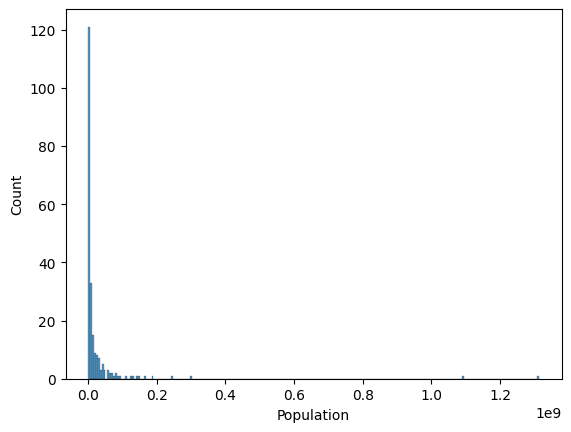

In [6]:
sns.histplot(data=df,x="Population")

<Axes: xlabel='Population', ylabel='Count'>

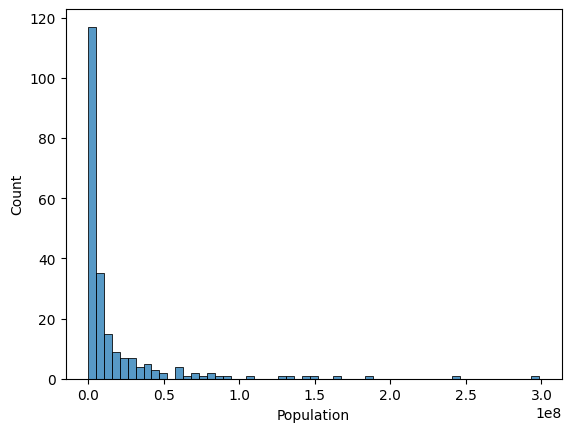

In [9]:
sns.histplot(data=df[df['Population']<500000000],x="Population")

In [10]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

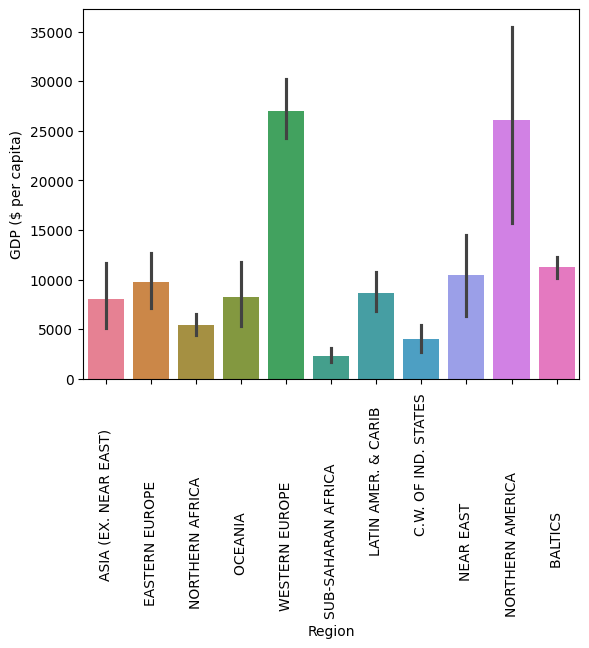

In [13]:
sns.barplot(data=df,y='GDP ($ per capita)',x="Region",hue="Region")
plt.xticks(rotation=90);

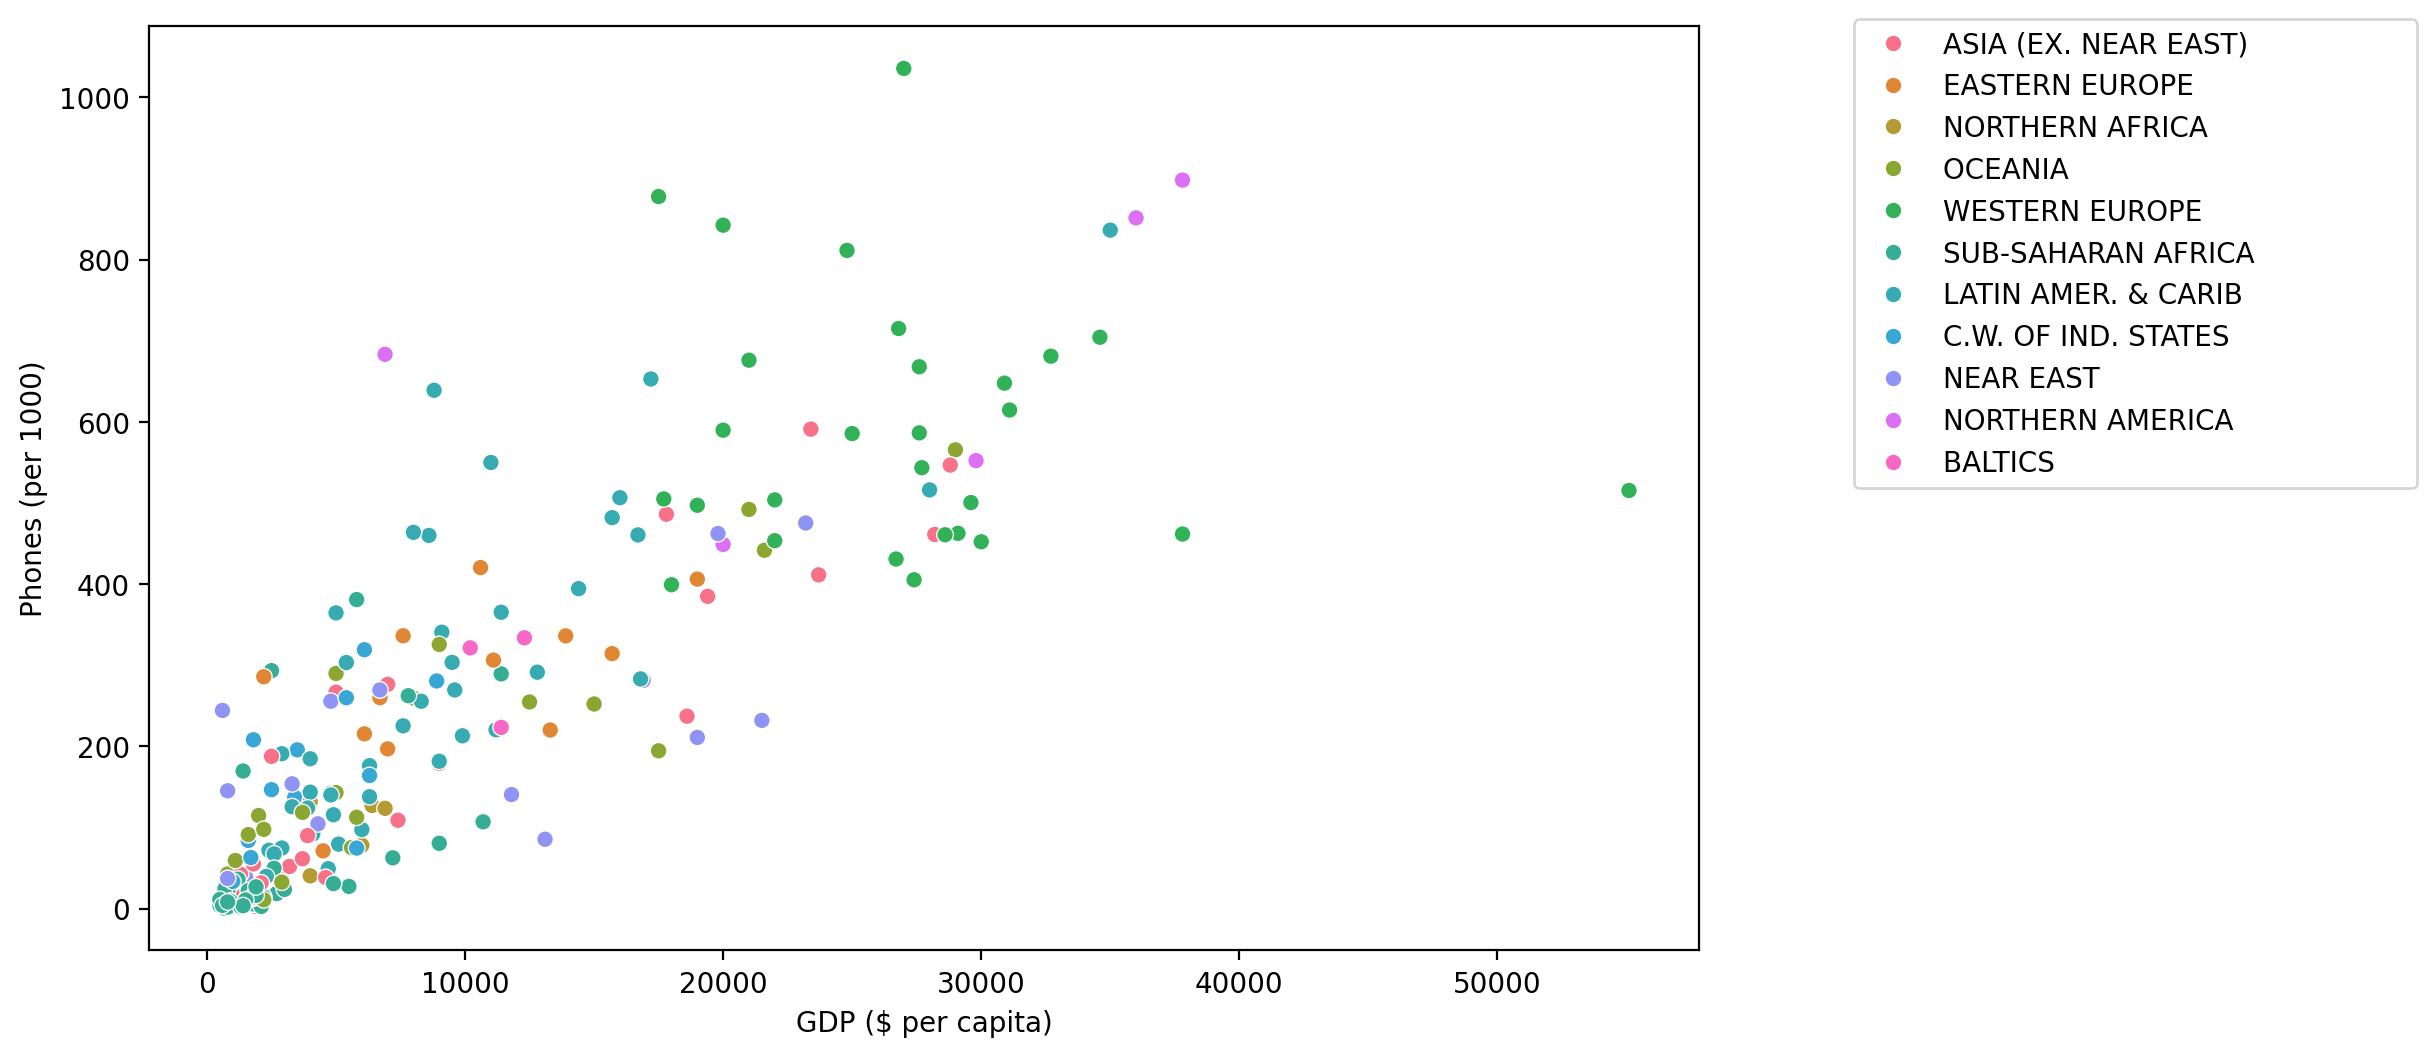

In [16]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x="GDP ($ per capita)",hue="Region",y="Phones (per 1000)")
plt.legend(loc=(1.1,0.5))

In [17]:
df[df['Phones (per 1000)']>900]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
138,Monaco,WESTERN EUROPE,32543,2,16271.5,205.0,7.75,5.43,27000.0,99.0,1035.6,0.0,0.0,100.0,NaN,9.19,12.91,0.17,NaN,NaN


In [18]:
df[df['GDP ($ per capita)']>50000]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.0,8.97,4.81,55100.0,100.0,515.4,23.28,0.4,76.32,NaN,11.94,8.41,0.01,0.13,0.86


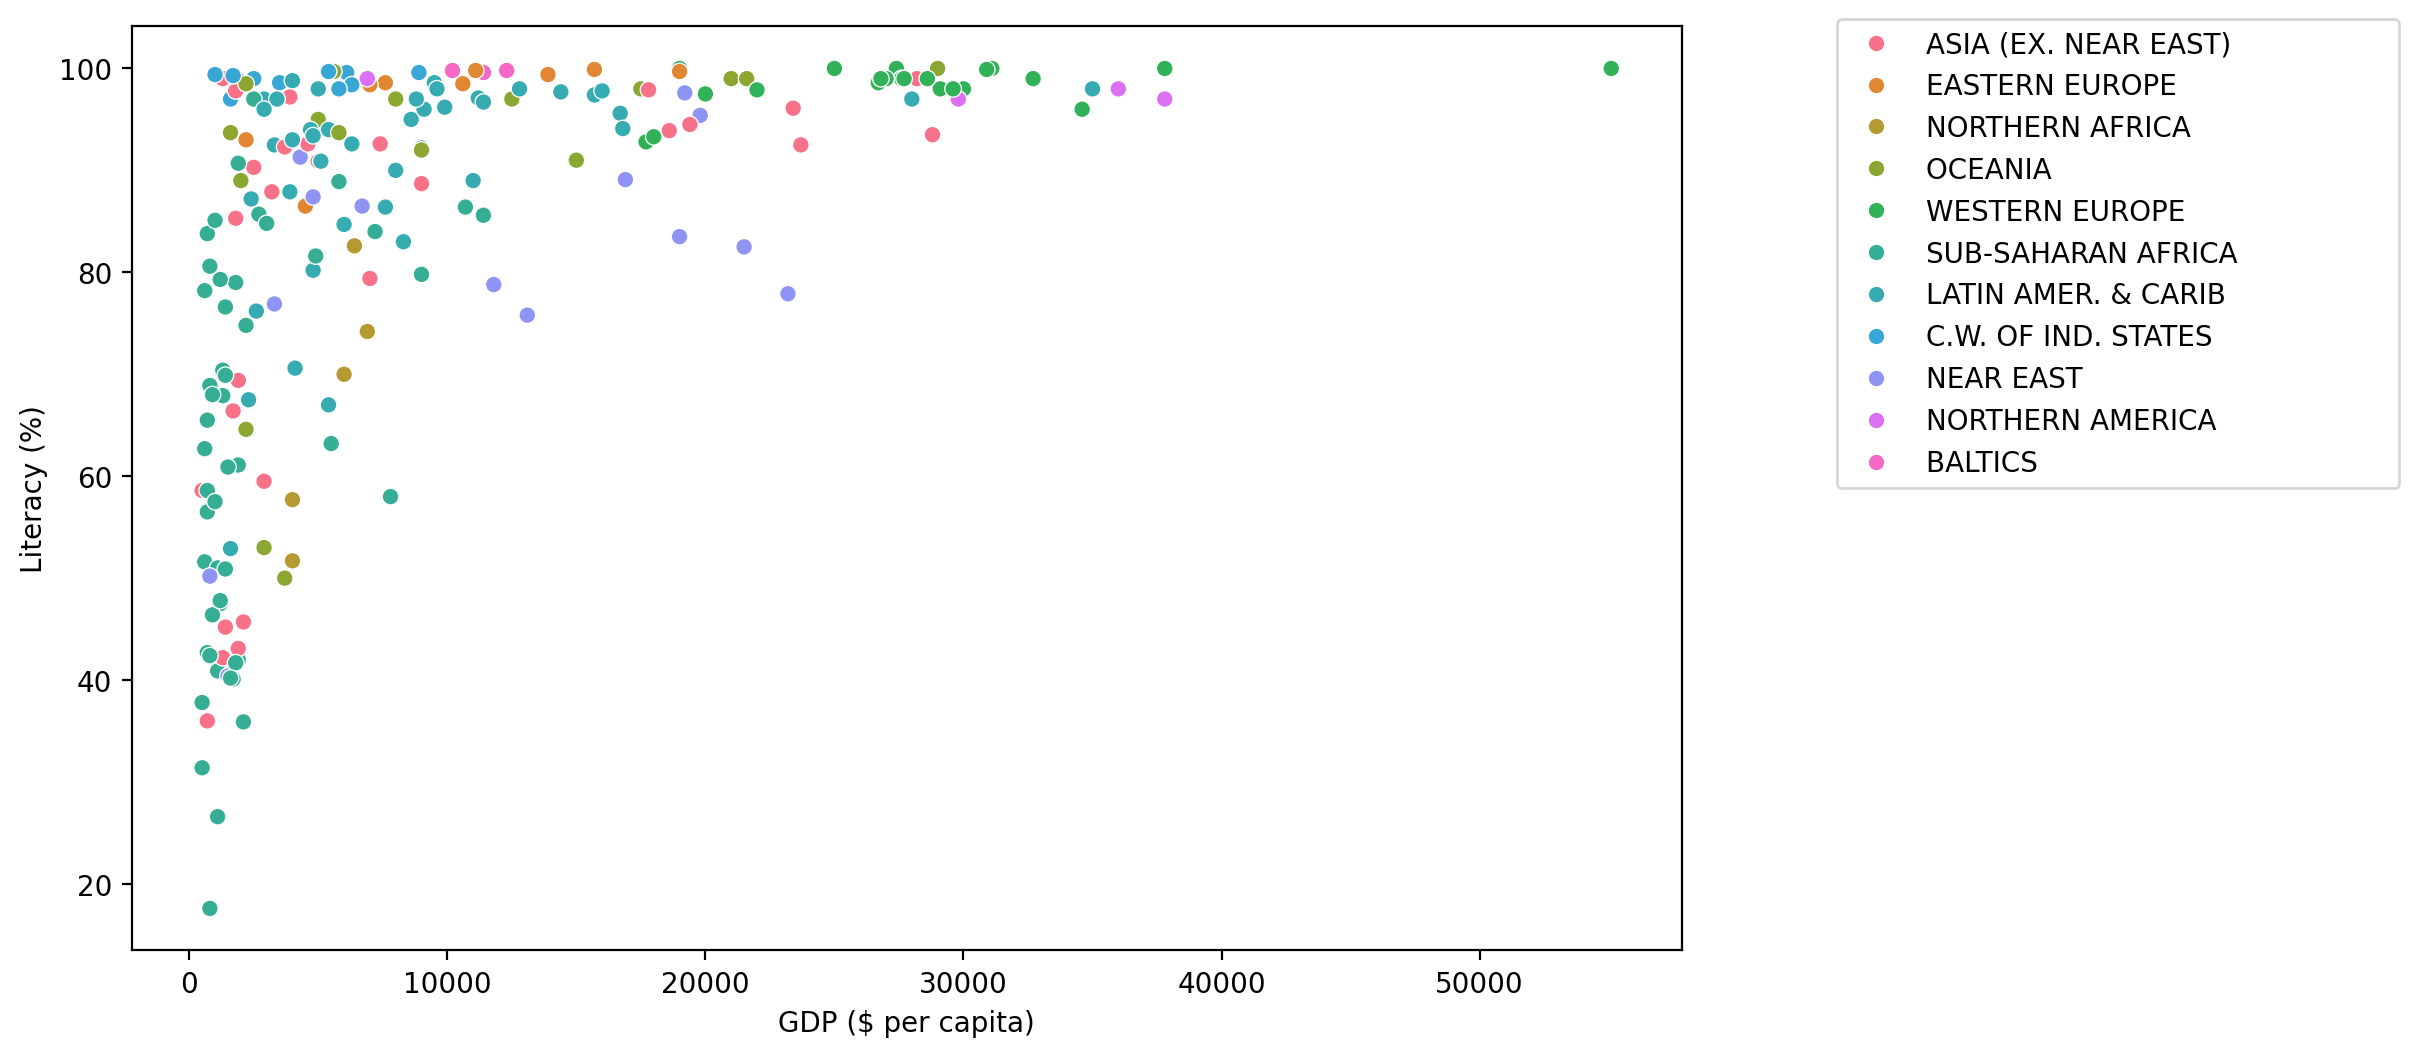

In [19]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x="GDP ($ per capita)",hue="Region",y="Literacy (%)")
plt.legend(loc=(1.1,0.5))

<Axes: >

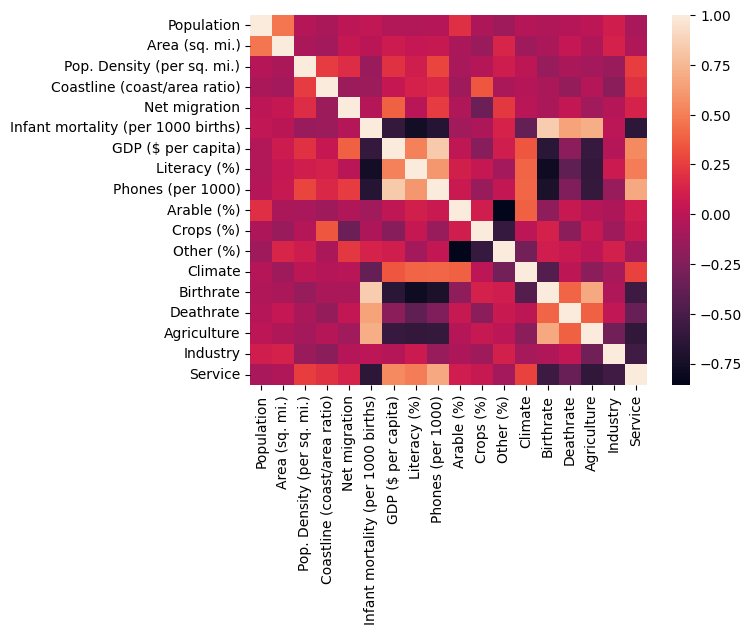

In [20]:
sns.heatmap(df.corr(numeric_only=True))

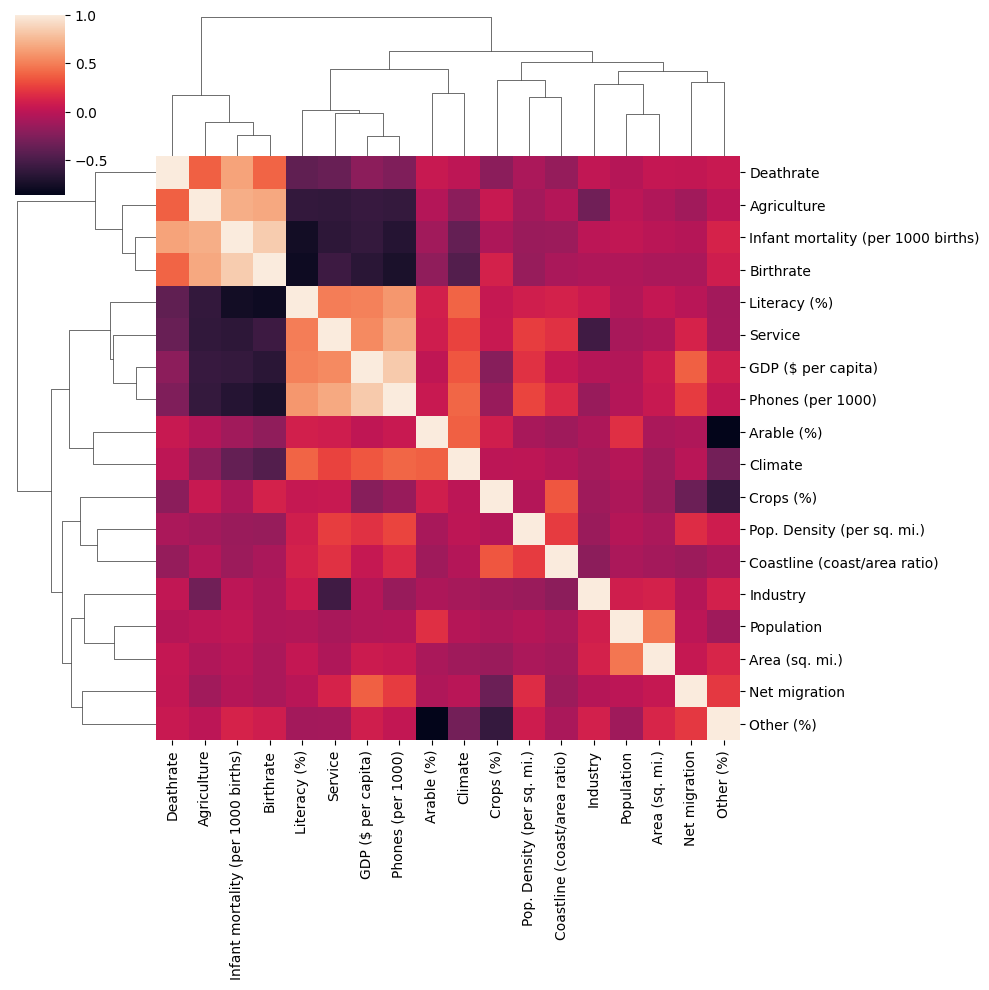

In [21]:
sns.clustermap(df.corr(numeric_only=True))

In [22]:
df.isnull().sum()

,0
Country,0
Region,0
Population,0
Area (sq. mi.),0
Pop. Density (per sq. mi.),0
Coastline (coast/area ratio),0
Net migration,3
Infant mortality (per 1000 births),3
GDP ($ per capita),1
Literacy (%),18


In [24]:
df[df['Agriculture'].isnull()]['Country']

,Country
3,American Samoa
4,Andorra
78,Gibraltar
80,Greenland
83,Guam
134,Mayotte
140,Montserrat
144,Nauru
153,N. Mariana Islands
171,Saint Helena


In [25]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [26]:
df.isnull().sum()

,0
Country,0
Region,0
Population,0
Area (sq. mi.),0
Pop. Density (per sq. mi.),0
Coastline (coast/area ratio),0
Net migration,1
Infant mortality (per 1000 births),1
GDP ($ per capita),0
Literacy (%),13


In [27]:
df["Climate"]=df["Climate"].fillna(df.groupby("Region")["Climate"].transform("mean"))

In [28]:
df.isnull().sum()

,0
Country,0
Region,0
Population,0
Area (sq. mi.),0
Pop. Density (per sq. mi.),0
Coastline (coast/area ratio),0
Net migration,1
Infant mortality (per 1000 births),1
GDP ($ per capita),0
Literacy (%),13


In [29]:
df["Literacy (%)"]=df["Literacy (%)"].fillna(df.groupby("Region")["Literacy (%)"].transform("mean"))

In [30]:
df.isnull().sum()

,0
Country,0
Region,0
Population,0
Area (sq. mi.),0
Pop. Density (per sq. mi.),0
Coastline (coast/area ratio),0
Net migration,1
Infant mortality (per 1000 births),1
GDP ($ per capita),0
Literacy (%),0


In [31]:
df = df.dropna()

In [32]:
X = df.drop("Country",axis=1)

In [33]:
X = pd.get_dummies(X)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
scaled_X = scaler.fit_transform(X)

In [37]:
scaled_X

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

In [38]:
from sklearn.cluster import KMeans

In [39]:
ssd=[]

for k in range(2,30):
  model =  KMeans(n_clusters=k)
  model.fit(scaled_X)
  ssd.append(model.inertia_)

Text(0, 0.5, 'SSD')

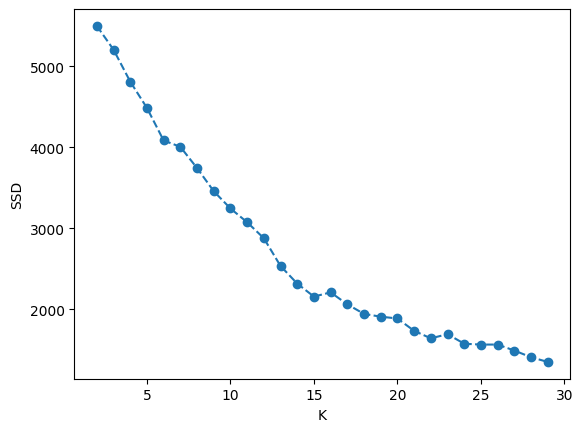

In [40]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K")
plt.ylabel("SSD")

<Axes: >

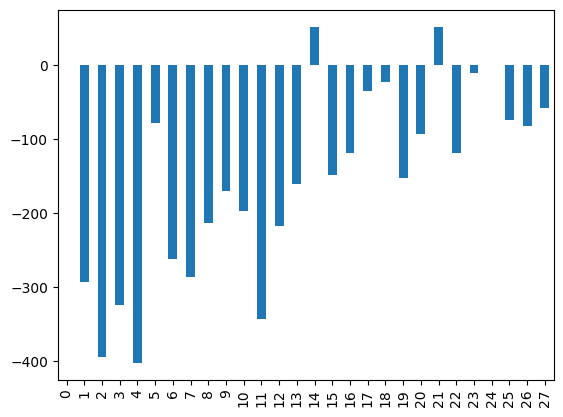

In [41]:
pd.Series(ssd).diff().plot(kind="bar")

In [42]:
model = KMeans(n_clusters=3)

In [43]:
model.fit(scaled_X)

KMeans(n_clusters=3)

In [45]:
X["K=3 Cluster Labels"] = model.labels_

<Axes: >

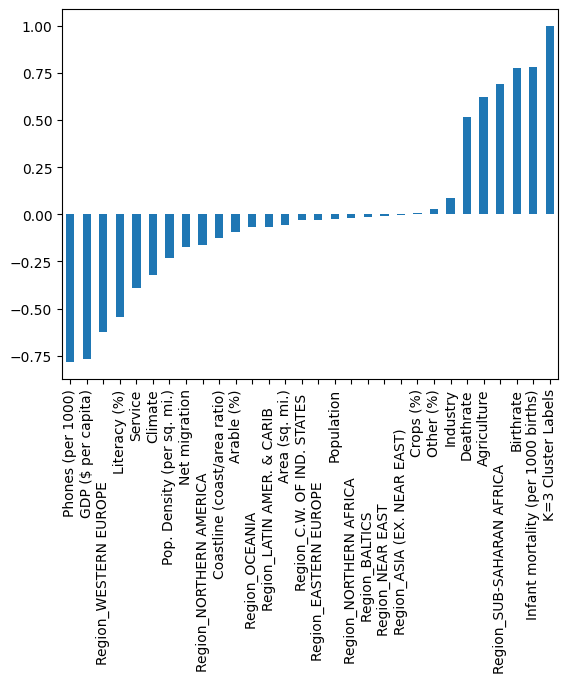

In [47]:
X.corr(numeric_only=True)["K=3 Cluster Labels"].sort_values().plot(kind="bar")

In [48]:
!pip install plotly

In [49]:
iso_codes = pd.read_csv("/content/country_iso_codes.csv")

In [52]:
iso_map = iso_codes.set_index("Country")["ISO Code"].to_dict()

In [53]:
df["ISO CODE"] = df["Country"].map(iso_map)

In [54]:
df["Cluster"] = model.labels_

In [59]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'ISO CODE', 'Cluster'],
      dtype='object')

In [61]:
import plotly.express as px

fig = px.choropleth(df, locations="ISO CODE",
                    color="Cluster",
                    hover_name="Country")
fig.show()